## 1. Reading the data from CSV file

In [1]:
import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')

In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2. Histogram of Credit Score using seaborn


<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

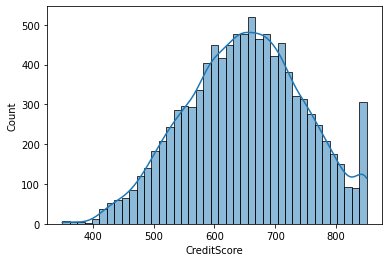

In [3]:
import seaborn as sns
sns.histplot(data=df['CreditScore'],kde=True)

## 3. ScatterPlot of Credit Score to Estimated Salary

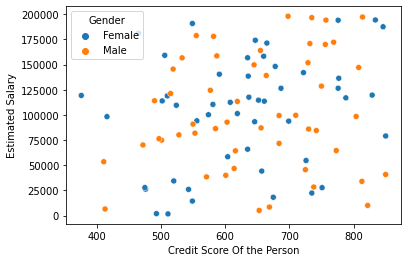

In [6]:
import matplotlib.pyplot as plt
sns.scatterplot(data=df[:100],x='CreditScore',y='EstimatedSalary',hue='Gender')
plt.xlabel('Credit Score Of the Person')
plt.ylabel('Estimated Salary')
plt.show()

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 4. Box plot to find Interquartile Range

<AxesSubplot:xlabel='EstimatedSalary'>

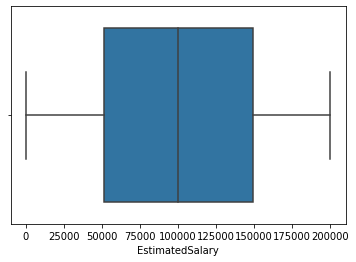

In [12]:
#Visualising the Outliers of Estimated Salary
sns.boxplot(x=df['EstimatedSalary'])

In [15]:
df.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       ...
       'category_Zubarev', 'category_Zubareva', 'category_Zuev',
       'category_Zuyev', 'category_Zuyeva', 'category_France',
       'category_Germany', 'category_Spain', 'category_Female',
       'category_Male'],
      dtype='object', length=2948)

In [14]:
df = pd.get_dummies(df,prefix_sep='_',prefix='category')
df.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,category_Zubarev,category_Zubareva,category_Zuev,category_Zuyev,category_Zuyeva,category_France,category_Germany,category_Spain,category_Female,category_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,1,0,0,1,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,1,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,1,0,0,1,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,1,0,0,1,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,1,1,0


In [25]:
X = pd.DataFrame(df.drop(['EstimatedSalary'],axis=1))
Y=pd.DataFrame(df['EstimatedSalary'],columns=['EstimatedSalary'])
X.head()
Y.head()

,EstimatedSalary
0,101348.88
1,112542.58
2,113931.57
3,93826.63
4,79084.10


## 5. Standardization of data

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.73187761, -0.78321342, -0.32622142, ..., -0.57380915,
         1.09598752, -1.09598752],
       [-1.7315312 , -0.60653412, -0.44003595, ...,  1.74273971,
         1.09598752, -1.09598752],
       [-1.73118479, -0.99588476, -1.53679418, ..., -0.57380915,
         1.09598752, -1.09598752],
       ...,
       [ 1.73118479, -1.47928179,  0.60498839, ..., -0.57380915,
         1.09598752, -1.09598752],
       [ 1.7315312 , -0.11935577,  1.25683526, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [ 1.73187761, -0.87055909,  1.46377078, ..., -0.57380915,
         1.09598752, -1.09598752]])

## 6. Splitting the dataset into training and testing sets

In [29]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_Y = train_test_split(X,Y,test_size=0.3)


,EstimatedSalary
6467,183051.60
6745,40333.94
8419,151146.67
4545,74042.00
8891,5240.53
